In [1]:
%pip install pandas
%pip install bs4
%pip install requests
%pip install nltk
%pip install unidecode
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Importing Dependencies**

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import nltk
from unidecode import unidecode
import re
from sklearn.feature_extraction.text  import TfidfVectorizer
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from wordcloud import WordCloud
import seaborn as sns
from sklearn import cluster

# Data Collection from Official Website

In [3]:
url = "https://www.presidency.ucsb.edu/documents/presidential-documents-archive-guidebook/presidential-campaigns-debates-and-endorsements-3"
speeches = []
page = requests.get(url)
soup = BeautifulSoup(page.text , "html.parser")
texts = soup.findAll("td");
names = []
links = []
for text in texts:
    tmp = text.findAll('a')
    if(tmp != []):
        names.append(tmp[0].text)
        links.append(tmp[0].get('href'))        
for i in range(len(links)):
    print(names[i] , links[i])
    print("---------------------")

Joseph Biden https://www.presidency.ucsb.edu/documents/address-wilmington-delaware-accepting-election-the-46th-president-the-united-states
---------------------
Donald Trump https://www.presidency.ucsb.edu/documents/remarks-new-york-city-accepting-election-the-45th-president-the-united-states
---------------------
Barack Obama https://www.presidency.ucsb.edu/documents/remarks-election-victory-celebration-chicago-illinois
---------------------
Barack Obama https://www.presidency.ucsb.edu/documents/address-chicago-accepting-election-the-44th-president-the-united-states
---------------------
George W. Bush https://www.presidency.ucsb.edu/documents/remarks-victory-celebration
---------------------
George W. Bush https://www.presidency.ucsb.edu/documents/address-austin-accepting-election-the-43rd-president-the-united-states
---------------------
Bill Clinton https://www.presidency.ucsb.edu/documents/remarks-victory-celebration-little-rock-arkansas
---------------------
Bill Clinton https://

In [4]:
names = names[0:23]
links = links[0:23]
for i in range(len(links)):
    print(names[i] , links[i])
    print("---------------------")

Joseph Biden https://www.presidency.ucsb.edu/documents/address-wilmington-delaware-accepting-election-the-46th-president-the-united-states
---------------------
Donald Trump https://www.presidency.ucsb.edu/documents/remarks-new-york-city-accepting-election-the-45th-president-the-united-states
---------------------
Barack Obama https://www.presidency.ucsb.edu/documents/remarks-election-victory-celebration-chicago-illinois
---------------------
Barack Obama https://www.presidency.ucsb.edu/documents/address-chicago-accepting-election-the-44th-president-the-united-states
---------------------
George W. Bush https://www.presidency.ucsb.edu/documents/remarks-victory-celebration
---------------------
George W. Bush https://www.presidency.ucsb.edu/documents/address-austin-accepting-election-the-43rd-president-the-united-states
---------------------
Bill Clinton https://www.presidency.ucsb.edu/documents/remarks-victory-celebration-little-rock-arkansas
---------------------
Bill Clinton https://

In [5]:
speeches = []
for link in links:
    page = requests.get(link)
    soup = BeautifulSoup(page.text, "html.parser")
    div_tag = soup.findAll("div", {"class": "field-docs-content"})
    p_tags = div_tag[0].find_all('p')
    speech = ""
    for p_tag in p_tags:
        speech = speech + p_tag.text
    speeches.append(speech)

In [6]:
speeches[1]

'Thank you. Thank you very much, everyone. [applause]Sorry to keep you waiting; complicated business; complicated. [applause]Thank you very much. [applause]I\'ve just received a call from Secretary Clinton. [applause]She congratulated us — it\'s about us — on our victory, and I congratulated her and her family on a very, very hard-fought campaign. I mean, she — she fought very hard.Hillary has worked very long and very hard over a long period of time, and we owe her a major debt of gratitude for her service to our country. [applause]I mean that very sincerely. [applause]Now it\'s time for America to bind the wounds of division; have to get together. To all Republicans and Democrats and independents across this nation, I say it is time for us to come together as one united people. [applause]It\'s time. I pledge to every citizen of our land that I will be president for all Americans, and this is so important to me. [applause]For those who have chosen not to support me in the past, of whi

In [7]:
data = pd.DataFrame({'President': names, 'Speech': speeches})
data.head()

,President,Speech
0,Joseph Biden,"My fellow Americans, and the people who brough..."
1,Donald Trump,"Thank you. Thank you very much, everyone. [app..."
2,Barack Obama,"Thank you so much. Tonight, more than 200 year..."
3,Barack Obama,If there is anyone out there who still doubts ...
4,George W. Bush,Thank you all. Thank you all for coming. We ha...


# Data Collection from Kaggle

In [8]:
temp = pd.read_csv('Speeches/first_party_corpus.csv')
print(len(temp))
temp.head()

6


,Unnamed: 0,Party,transcripts
0,George Washington,Unaffiliated,Fellow Citizens of the Senate and the House of...
1,John Adams,Federalist,"When it was first perceived, in early times, t..."
2,Thomas Jefferson,Democratic-Republican,"FRIENDS AND FELLOW-CITIZENS, Called upon to un..."
3,James Madison,Democratic-Republican,Unwilling to depart from examples of the most ...
4,James Monroe,Democratic-Republican,I should be destitute of feeling if I was not ...


In [9]:
temp = temp.drop('Party', axis=1)
temp = temp.rename(columns={'Unnamed: 0': 'President', 'transcripts': 'Speech'})
data = pd.concat([data, temp])

In [10]:
temp = pd.read_csv('Speeches/second_party_corpus.csv')
print(len(temp))
temp.head()

9


,Unnamed: 0,Party,transcripts
0,John Quincy Adams,Democratic-Republican,In compliance with an usage coeval with the ex...
1,Andrew Jackson,Democratic,Fellow Citizens: About to undertake the arduou...
2,Martin Van Buren,Democratic,Fellow Citizens: The practice of all my predec...
3,William Harrison,Whig,Called from a retirement which I had supposed ...
4,John Tyler,Unaffiliated,To the People of the United States Before my a...


In [11]:
temp = temp.drop('Party', axis=1)
temp = temp.rename(columns={'Unnamed: 0': 'President', 'transcripts': 'Speech'})
data = pd.concat([data, temp])

In [12]:
temp = pd.read_csv('Speeches/third_party_corpus.csv')
print(len(temp))
temp.head()

10


,Unnamed: 0,Party,transcripts
0,Franklin Pierce,Democratic,My Countrymen: It a relief to feel that no hea...
1,James Buchanan,Democratic,Fellow Citizens: I appear before you this day ...
2,Abraham Lincoln,Republican,"The repeal of the Missouri Compromise, and the..."
3,Andrew Johnson,Democratic,I must be permitted to say that I have been al...
4,Ulysses S. Grant,Republican,Citizens of the United States: Your suffrages ...


In [13]:
temp = temp.drop('Party', axis=1)
temp = temp.rename(columns={'Unnamed: 0': 'President', 'transcripts': 'Speech'})
data = pd.concat([data, temp])

In [14]:
temp = pd.read_csv('Speeches/fourth_party_corpus.csv')
print(len(temp))
temp.head()

7


,Unnamed: 0,Party,transcripts
0,William McKinley,Republican,Fellow Citizens: In obedience to the will of t...
1,William Taft,Republican,My Fellow Citizens: Anyone who has taken the o...
2,Woodrow Wilson,Democratic,There has been a change of government. It bega...
3,Warren G. Harding,Republican,"My countrymen, the surpassing war of all times..."
4,Calvin Coolidge,Republican,Since the close of the last Congress the Natio...


In [15]:
temp = temp.drop('Party', axis=1)
temp = temp.rename(columns={'Unnamed: 0': 'President', 'transcripts': 'Speech'})
data = pd.concat([data, temp])

In [16]:
temp = pd.read_csv('Speeches/fifth_party_corpus.csv')
print(len(temp))
temp.head()

6


,Unnamed: 0,Party,transcripts
0,Franklin D. Roosevelt,Democratic,"President Hoover, Mr. Chief Justice, my friend..."
1,Harry S. Truman,Democratic,"Mr. Speaker, Mr. President, Members of the Con..."
2,Dwight D. Eisenhower,Republican,"My friends, before I begin the expression of t..."
3,John F. Kennedy,Democratic,"Governor Stevenson, Senator Johnson, Mr. Butle..."
4,Lyndon B. Johnson,Democratic,"On this hallowed ground, heroic deeds were per..."


In [17]:
temp = temp.drop('Party', axis=1)
temp = temp.rename(columns={'Unnamed: 0': 'President', 'transcripts': 'Speech'})
data = pd.concat([data, temp])

In [18]:
temp = pd.read_csv('Speeches/sixth_party_corpus.csv')
print(len(temp))
temp.head()

10


,Unnamed: 0,Party,transcripts
0,Lyndon B. Johnson,Democratic,"Mr. Speaker, Mr. President, Members of the Hou..."
1,Richard M. Nixon,Republican,"Senator Dirksen, Mr. Chief Justice, Mr. Vice P..."
2,Gerald Ford,Republican,"Mr. Chief Justice, my dear friends, my fellow ..."
3,Jimmy Carter,Democratic,"I am Edwin Newman, moderator of this first deb..."
4,Ronald Reagan,Republican,Thank you. Thank you very much. Thank you and ...


In [19]:
temp = temp.drop('Party', axis=1)
temp = temp.rename(columns={'Unnamed: 0': 'President', 'transcripts': 'Speech'})
data = pd.concat([data, temp])

# Exploring the Data

In [20]:
data.head()

,President,Speech
0,Joseph Biden,"My fellow Americans, and the people who brough..."
1,Donald Trump,"Thank you. Thank you very much, everyone. [app..."
2,Barack Obama,"Thank you so much. Tonight, more than 200 year..."
3,Barack Obama,If there is anyone out there who still doubts ...
4,George W. Bush,Thank you all. Thank you all for coming. We ha...


In [21]:
len(data)

71

In [22]:
data['President'].unique()

array(['Joseph Biden', 'Donald Trump', 'Barack Obama', 'George W. Bush',
       'Bill Clinton', 'George Bush', 'Ronald Reagan', 'Jimmy Carter',
       'Richard Nixon', 'Lyndon Johnson', 'John F. Kennedy',
       'Dwight Eisenhower', 'Harry S. Truman', 'Calvin Coolidge',
       'Woodrow Wilson', 'Theodore Roosevelt', 'William McKinley',
       'George Washington', 'John Adams', 'Thomas Jefferson',
       'James Madison', 'James Monroe', 'John Quincy Adams',
       'Andrew Jackson', 'Martin Van Buren', 'William Harrison',
       'John Tyler', 'James K. Polk', 'Zachary Taylor',
       'Millard Fillmore', 'Abraham Lincoln', 'Franklin Pierce',
       'James Buchanan', 'Andrew Johnson', 'Ulysses S. Grant',
       'Rutherford B. Hayes', 'James A. Garfield', 'Chester A. Arthur',
       'Grover Cleveland', 'Benjamin Harrison', 'William Taft',
       'Warren G. Harding', 'Herbert Hoover', 'Franklin D. Roosevelt',
       'Dwight D. Eisenhower', 'Lyndon B. Johnson', 'Richard M. Nixon',
       'Ger

In [23]:
len(data['President'].unique())

49

In [24]:
speeches = data['Speech'].tolist()
presidents = data['President'].tolist()

**So we have total 71 speeches of 49 different USA presidents**

# Processing the Data and getting insights from it

**Cleaning the Data**

In [31]:
for speech in speeches:
    index = speeches.index(speech)
    speeches[index] = speeches[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
    speeches[index] = speeches[index].replace(',', '')          # Removes commas
    speeches[index] = speeches[index].rstrip('\n')              # Removes line breaks
    speeches[index] = speeches[index].casefold()                # Makes all letters lowercase
    
    speeches[index] = re.sub('\W_',' ', speeches[index])        # removes specials characters and leaves only words
    speeches[index] = re.sub("\S*\d\S*"," ", speeches[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
    speeches[index] = re.sub("\S*@\S*\s?"," ", speeches[index]) # removes emails and mentions (words with @)
    speeches[index] = re.sub(r'http\S+', '', speeches[index])   # removes URLs with http
    speeches[index] = re.sub(r'www\S+', '', speeches[index])    # removes URLs with www
    

**Tokenizing the Data**

In [32]:
token_speeches = []
for speech in speeches:
    token_speeches.append(nltk.tokenize.word_tokenize(speech))

**Removing the stop words and other unnecessary words**

In [64]:
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 21:
            twoLetterWord.append(token)
    return twoLetterWord

stopwords = nltk.corpus.stopwords.words()


In [ ]:
for token_speech in token_speeches:
    index = token_speeches.index(token_speech)
    twoLetterWord = twoLetters(token_speeches[index])
    token_speeches[index] = removeWords(token_speeches[index], stopwords)
    token_speeches[index] = removeWords(token_speeches[index], twoLetterWord)
    token_speeches[index] = removeWords(token_speeches[index] ,['america','America',"'ve","'re",'one','and'])

**Stemming the Data**

In [97]:
stemmer = nltk.PorterStemmer()


In [ ]:
for token_speech in token_speeches:
    index = token_speeches.index(token_speech)
    token_speeches[index] = [stemmer.stem(token) for token in token_speeches[index]]

**Converting the list of tokens to string and unidecoding it**

In [35]:
for index in range(len(token_speeches)):
    speeches[index] = " ".join(token_speeches[index])
    speeches[index] = unidecode(speeches[index])

In [36]:
file_path = 'my_strings.txt'
with open(file_path, 'w') as file:
    for string in speeches:
        file.write(string + '\n')

In [25]:
speeches = []
file = open('my_strings.txt', 'r')
for line in file:
    speeches.append(line)

In [26]:
len(speeches)

71

**Vectorizing the data**

In [29]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(speeches)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

In [30]:
tf_idf.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
folk,0.205878,0.040295,0.063482,0.000000,0.000000,0.000000,0.000000,0.028718,0.048094,0.000000,...,0.005844,0.000000,0.000000,0.000000,0.002130,0.021723,0.014450,0.014700,0.058738,0.031611
battl,0.197118,0.000000,0.042546,0.000000,0.000000,0.000000,0.016834,0.000000,0.000000,0.000000,...,0.022662,0.004983,0.010503,0.003538,0.008922,0.014559,0.005607,0.012589,0.011405,0.008474
make,0.191120,0.000000,0.142794,0.064852,0.079549,0.070495,0.050222,0.028711,0.000000,0.046341,...,0.089934,0.095137,0.069385,0.094107,0.094219,0.104015,0.150543,0.111036,0.187689,0.107447
and,0.181652,0.071106,0.056012,0.057237,0.000000,0.000000,0.088649,0.025339,0.509219,0.109066,...,0.001473,0.007872,0.000000,0.011643,0.000470,0.001009,0.000000,0.000000,0.000484,0.036816
time,0.173957,0.069513,0.078224,0.143883,0.000000,0.034756,0.160944,0.056620,0.047410,0.045695,...,0.133534,0.118728,0.072831,0.095396,0.140144,0.136376,0.122203,0.091776,0.137721,0.107818


**Now we can see we have 70 columns in our data. One column for each speech and corresponding to each word we have some value which indicates the importance of that word in that particular speech**

**Now the processing part is completed and we will start analysing our data and start making clusters of presidents after comparing their speeches**

# Analysing and Visualizing the Data

**First approach is we are going to use K means clustering to cluster our data**

**But we still do not know the number of clusters in our data so we will use two different methods to select the appropriate value of K**

* **Elbow method**
* **Silhouette Score**


# Elbow Method

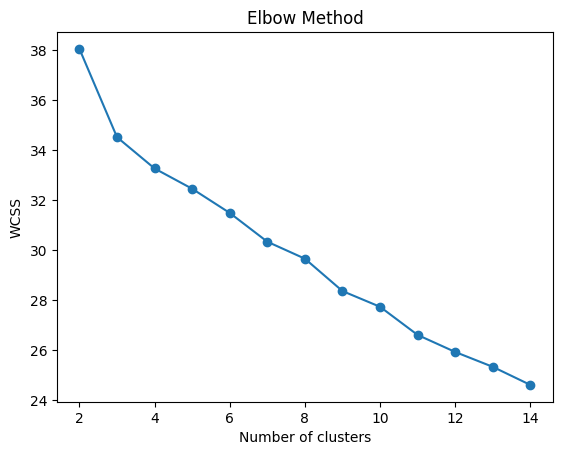

In [31]:
wcss = []
for i in range(2, 15):
    kmeans = sklearn.cluster.KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=1,tol = 0.0001 , algorithm='lloyd')
    kmeans.fit(tf_idf)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(2, 15), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score

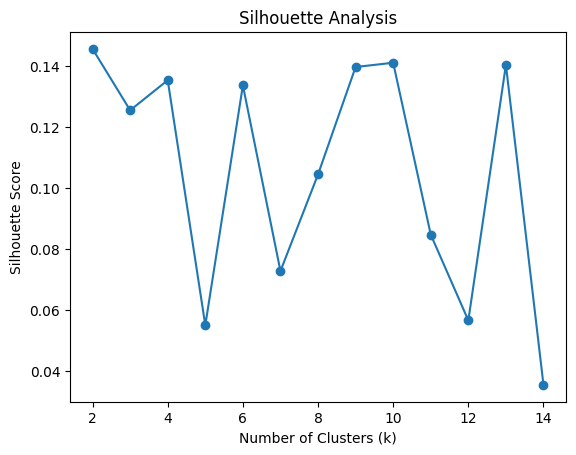

In [32]:
silhouette_scores = []
for k in range(2,15):
    kmeans = sklearn.cluster.KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=1,tol = 0.0001 , algorithm='lloyd')
    cluster_labels = kmeans.fit_predict(tf_idf)
    silhouette_avg = silhouette_score(tf_idf, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores
plt.plot(range(2,15), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

**From the above two methods we can see that value of k = 5 will be good for our data**

**So we have five clusters in our data**

In [33]:
kmeans = sklearn.cluster.KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1,tol = 0.0001 , algorithm='lloyd')
kmeans.fit(tf_idf)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [34]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4], dtype=int32)

In [53]:
centroids

array([[ 1.01643954e-20, -6.77626358e-21,  3.93153717e-04, ...,
        -1.35525272e-20, -1.35525272e-20,  5.28837567e-04],
       [-3.38813179e-21, -1.35525272e-20, -2.71050543e-20, ...,
        -4.06575815e-20, -1.69406589e-20,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.38813179e-21,  2.92967380e-04, -2.71050543e-20, ...,
         1.35525272e-20,  3.38813179e-21,  2.71050543e-20],
       [ 1.19856020e-04, -6.77626358e-21,  1.81232802e-04, ...,
         3.54998416e-04,  1.25492084e-04,  2.71050543e-20]])

# Visualizing the results

In [54]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


In [55]:

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

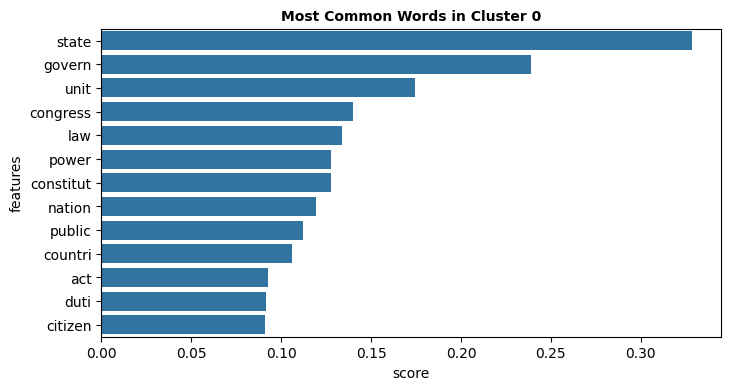

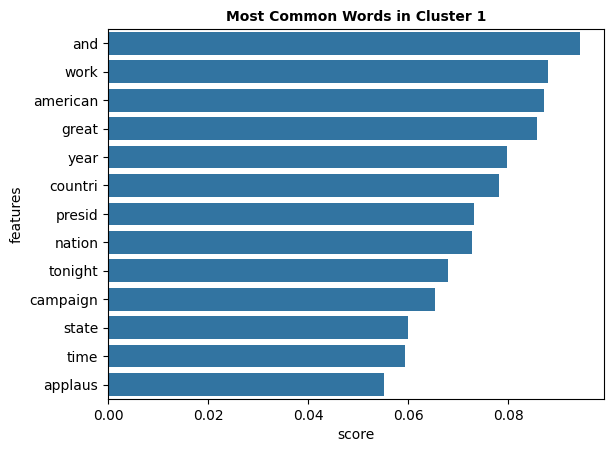

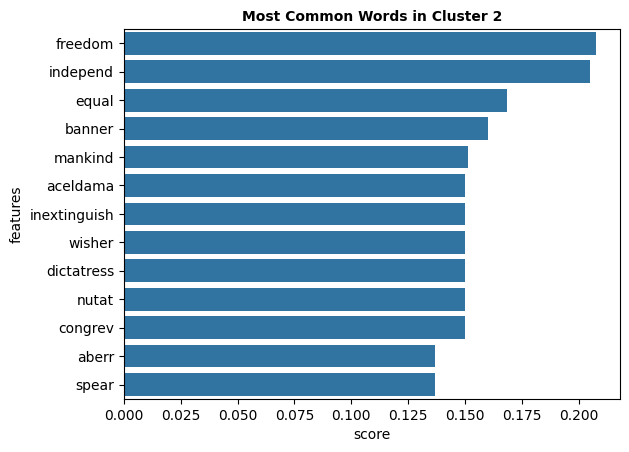

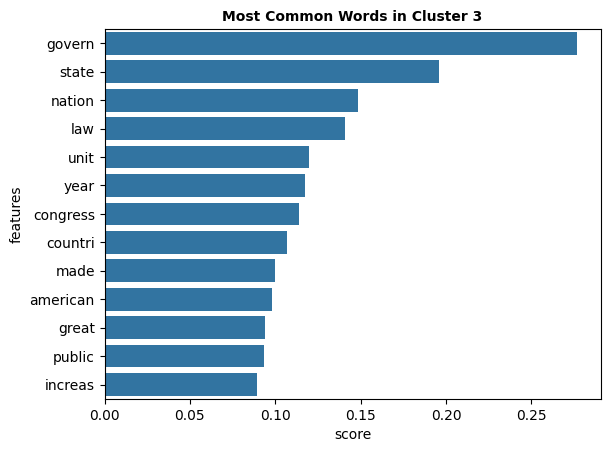

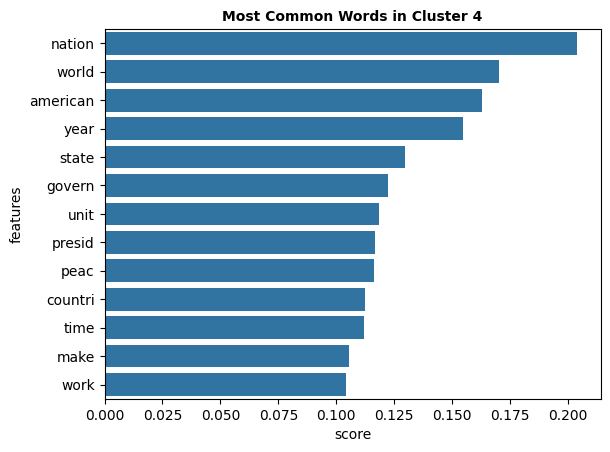

In [56]:
final_df_array = tf_idf.to_numpy()
prediction = kmeans.predict(tf_idf)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [57]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict


In [58]:

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

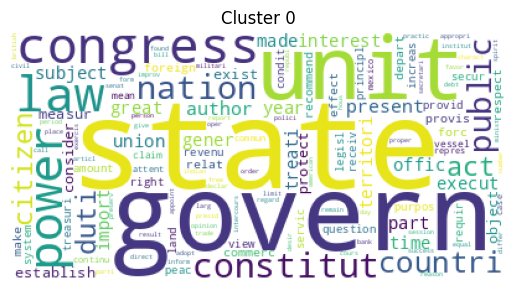

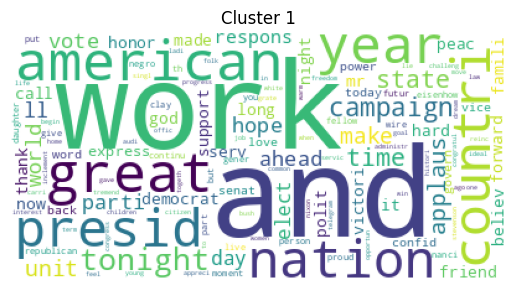

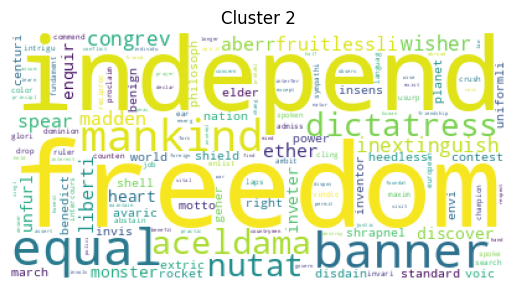

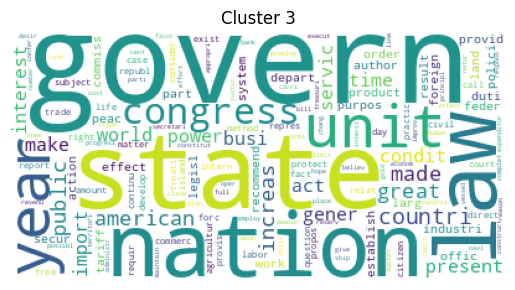

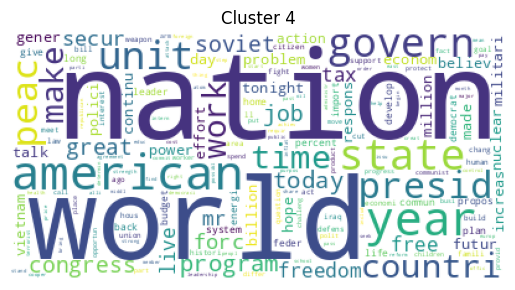

In [59]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = tf_idf.columns
generateWordClouds(centroids)

In [36]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4], dtype=int32)

In [37]:
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []


for i in range(len(presidents)):
    if(labels[i] == 0):
        cluster0.append(presidents[i]);
    if(labels[i] == 1):
        cluster1.append(presidents[i]);
    if(labels[i] == 2):
        cluster2.append(presidents[i]);
    if(labels[i] == 3):
        cluster3.append(presidents[i]);
    if(labels[i] == 4):
        cluster4.append(presidents[i]);

In [63]:
cluster0

['George Washington',
 'John Adams',
 'Thomas Jefferson',
 'James Madison',
 'James Monroe',
 'John Quincy Adams',
 'Andrew Jackson',
 'Martin Van Buren',
 'William Harrison',
 'John Tyler',
 'James K. Polk',
 'Zachary Taylor',
 'Millard Fillmore',
 'Franklin Pierce',
 'James Buchanan',
 'Abraham Lincoln',
 'Andrew Johnson',
 'Ulysses S. Grant',
 'Rutherford B. Hayes',
 'James A. Garfield',
 'Chester A. Arthur']

In [64]:
cluster1

['Joseph Biden',
 'Donald Trump',
 'Barack Obama',
 'Barack Obama',
 'George W. Bush',
 'George W. Bush',
 'Bill Clinton',
 'Bill Clinton',
 'George Bush',
 'Ronald Reagan',
 'Ronald Reagan',
 'Jimmy Carter',
 'Richard Nixon',
 'Richard Nixon',
 'Lyndon Johnson',
 'John F. Kennedy',
 'Dwight Eisenhower',
 'Dwight Eisenhower',
 'Harry S. Truman',
 'Calvin Coolidge',
 'Woodrow Wilson',
 'Theodore Roosevelt',
 'William McKinley',
 'Abraham Lincoln',
 'Lyndon B. Johnson',
 'Richard M. Nixon']

In [65]:
cluster2

['John Quincy Adams']

In [66]:
cluster3

['Grover Cleveland',
 'Benjamin Harrison',
 'William McKinley',
 'William Taft',
 'Woodrow Wilson',
 'Warren G. Harding',
 'Calvin Coolidge',
 'Herbert Hoover',
 'Theodore Roosevelt']

In [67]:
cluster4

['Franklin D. Roosevelt',
 'Harry S. Truman',
 'Dwight D. Eisenhower',
 'John F. Kennedy',
 'Lyndon B. Johnson',
 'Richard M. Nixon',
 'Gerald Ford',
 'Jimmy Carter',
 'Ronald Reagan',
 'George H. W. Bush',
 'Bill Clinton',
 'George W. Bush',
 'Barack Obama',
 'Donald Trump']

# Personality profile

In [38]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
speech_sentiments = []
for speech in speeches:
    sentiment_score = sid.polarity_scores(speech)
    speech_sentiments.append(sentiment_score)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rohit/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
print(speech_sentiments)

[{'neg': 0.069, 'neu': 0.719, 'pos': 0.212, 'compound': 0.9986}, {'neg': 0.025, 'neu': 0.65, 'pos': 0.325, 'compound': 0.9997}, {'neg': 0.077, 'neu': 0.679, 'pos': 0.245, 'compound': 0.9993}, {'neg': 0.114, 'neu': 0.702, 'pos': 0.184, 'compound': 0.9959}, {'neg': 0.031, 'neu': 0.57, 'pos': 0.398, 'compound': 0.9993}, {'neg': 0.032, 'neu': 0.699, 'pos': 0.269, 'compound': 0.9993}, {'neg': 0.074, 'neu': 0.695, 'pos': 0.231, 'compound': 0.9994}, {'neg': 0.025, 'neu': 0.697, 'pos': 0.278, 'compound': 0.9996}, {'neg': 0.032, 'neu': 0.61, 'pos': 0.359, 'compound': 0.9989}, {'neg': 0.081, 'neu': 0.763, 'pos': 0.156, 'compound': 0.9886}, {'neg': 0.087, 'neu': 0.759, 'pos': 0.154, 'compound': 0.9653}, {'neg': 0.087, 'neu': 0.634, 'pos': 0.279, 'compound': 0.9919}, {'neg': 0.025, 'neu': 0.639, 'pos': 0.335, 'compound': 0.9979}, {'neg': 0.088, 'neu': 0.756, 'pos': 0.156, 'compound': 0.9859}, {'neg': 0.036, 'neu': 0.751, 'pos': 0.213, 'compound': 0.9961}, {'neg': 0.02, 'neu': 0.742, 'pos': 0.239, 

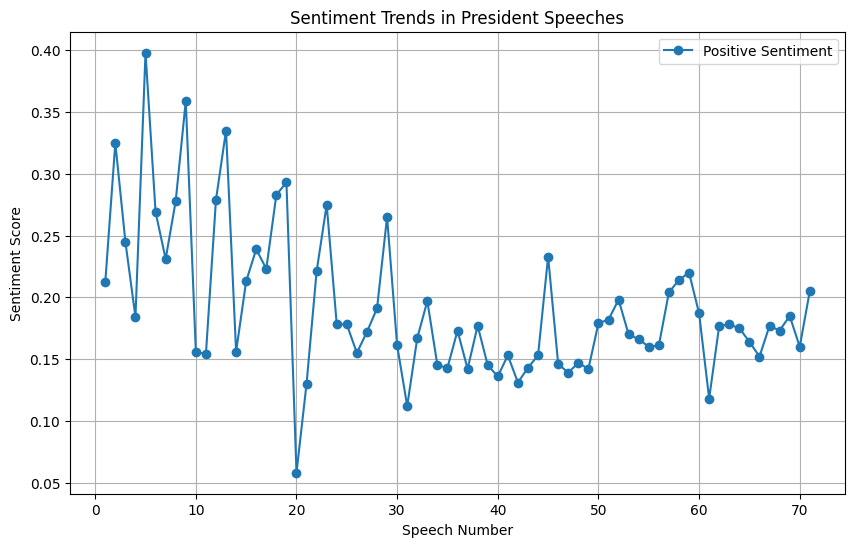

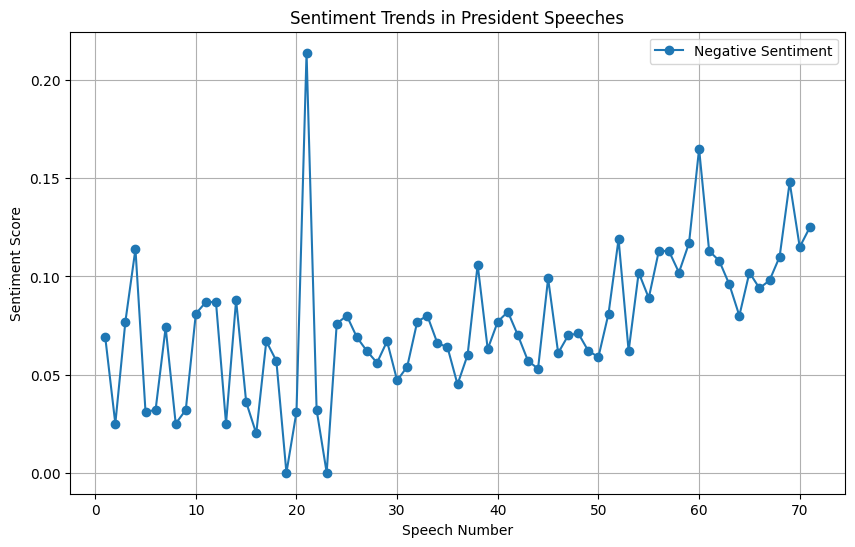

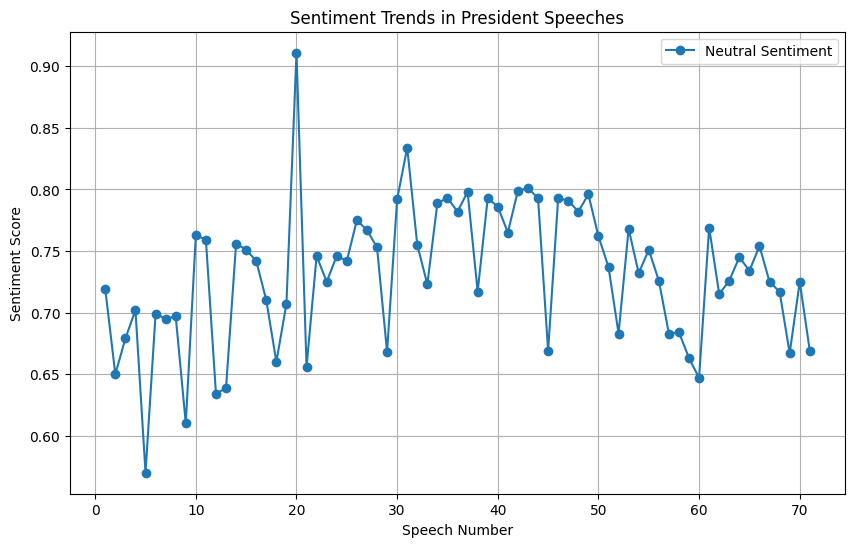

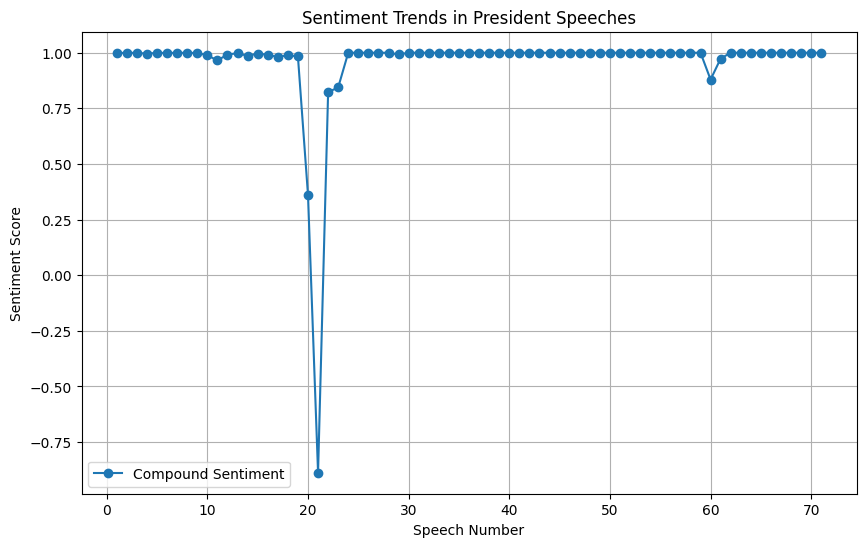

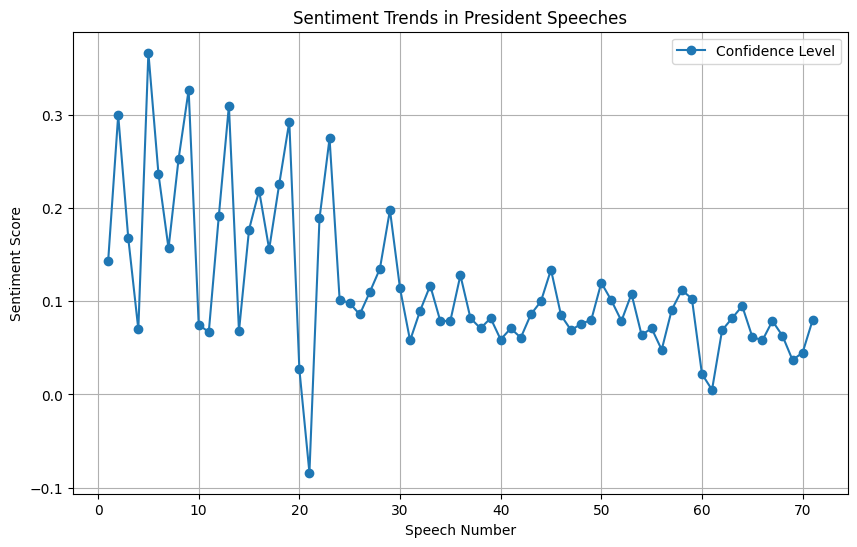

In [47]:
import matplotlib.pyplot as plt

# Assume 'speech_sentiments' is a list containing sentiment scores for each speech

# Extracting sentiment scores for analysis
positive_sentiments = [s['pos'] for s in speech_sentiments]
negative_sentiments = [s['neg'] for s in speech_sentiments]
neutral_sentiments = [s['neu'] for s in speech_sentiments]
compound_sentiments = [s['compound'] for s in speech_sentiments]
pos_neg = [s['pos'] - s['neg'] for s in speech_sentiments]
# Visualizing sentiment trends
speech_numbers = list(range(1, len(speech_sentiments) + 1))

plt.figure(figsize=(10, 6))
plt.plot(speech_numbers, positive_sentiments, label='Positive Sentiment', marker='o')
plt.xlabel('Speech Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends in President Speeches')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(speech_numbers, negative_sentiments, label='Negative Sentiment', marker='o')
plt.xlabel('Speech Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends in President Speeches')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(speech_numbers, neutral_sentiments, label='Neutral Sentiment', marker='o')
plt.xlabel('Speech Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends in President Speeches')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(speech_numbers, compound_sentiments, label='Compound Sentiment', marker='o')
plt.xlabel('Speech Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends in President Speeches')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(speech_numbers, pos_neg, label='Confidence Level', marker='o')
plt.xlabel('Speech Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends in President Speeches')
plt.legend()
plt.grid(True)
plt.show()




**Here we have ranking for each of the US Presidents collected from https://www.c-span.org/presidentsurvey2021/?page=overall**

In [41]:
temp = pd.read_csv('scores.csv')
temp = temp.head(71)
temp.head()

,President,Popularity score
0,Joseph Biden,312
1,Donald Trump,312
2,Barack Obama,664
3,Barack Obama,664
4,George W. Bush,495


In [50]:
pop_score = temp['Popularity score'].tolist()

# Calculating score for each cluster

In [52]:
cluster_pop_scores = []
cluster_confid_scores = []

cp0 = 0
cn0 = 0
cc0 = 0

cp1 = 0
cn1 = 0
cc1 = 0

cp2 = 0
cn2 = 0
cc2 = 0

cp3 = 0
cn3 = 0
cc3 = 0

cp4 = 0
cn4 = 0
cc4 = 0

for i in range(len(presidents)):
    if(labels[i] == 0):
        cp0 = cp0 + pop_score[i]
        cc0 = cc0 + pos_neg[i]
        cn0 = cn0 + 1

    if(labels[i] == 1):
        cp1 = cp1 + pop_score[i]
        cc1 = cc1 + pos_neg[i]
        cn1 = cn1 + 1

    if(labels[i] == 2):
        cp2 = cp2 + pop_score[i]
        cc2 = cc2 + pos_neg[i]
        cn2 = cn2 + 1

    if(labels[i] == 3):
        cp3 = cp3 + pop_score[i]
        cc3 = cc3 + pos_neg[i]
        cn3 = cn3 + 1

    if(labels[i] == 4):
        cp4 = cp4 + pop_score[i]
        cc4 = cc4 + pos_neg[i]
        cn4 = cn4 + 1

cluster_pop_scores.append(cp0/cn0)
cluster_pop_scores.append(cp1/cn1)
cluster_pop_scores.append(cp2/cn2)
cluster_pop_scores.append(cp3/cn3)
cluster_pop_scores.append(cp4/cn4)

cluster_confid_scores.append(cc0/cn0)
cluster_confid_scores.append(cc1/cn1)
cluster_confid_scores.append(cc2/cn2)
cluster_confid_scores.append(cc3/cn3)
cluster_confid_scores.append(cc4/cn4)

print("Popularity Score")
print(cluster_pop_scores)
print("-----"*10)
print("Confidence Score")
print(cluster_confid_scores)

Popularity Score
[517.1904761904761, 600.3461538461538, 603.0, 540.1111111111111, 602.8571428571429]
--------------------------------------------------
Confidence Score
[0.09314285714285714, 0.16576923076923084, 0.198, 0.08533333333333333, 0.07314285714285715]


# Dendogram Analysis

In [69]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tf_idf)

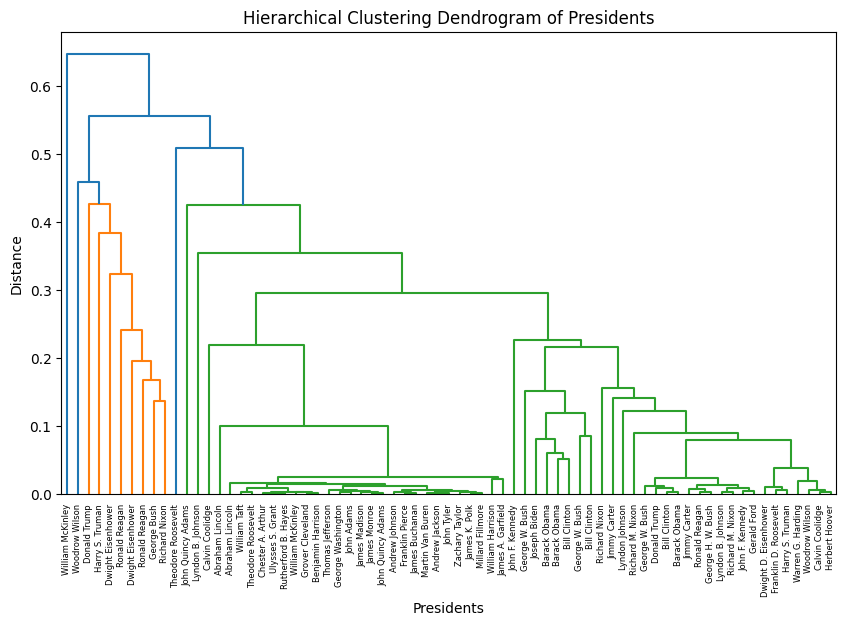

In [72]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical/agglomerative clustering
linkage_matrix = linkage(similarity_matrix, method='complete', metric='cosine')

# Plotting dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=presidents, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram of Presidents')
plt.xlabel('Presidents')
plt.ylabel('Distance')
plt.show()

# Application

**Taking a new speech and telling that it belongs to which cluster**

In [98]:
def tell_cluster_and_popscore(speech):
    speech = speech.replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
    speech = speech.replace(',', '')          # Removes commas
    speech = speech.rstrip('\n')              # Removes line breaks
    speech = speech.casefold()                # Makes all letters lowercase
    
    speech = re.sub('\W_',' ', speech)        # removes specials characters and leaves only words
    speech = re.sub("\S*\d\S*"," ", speech)   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
    speech = re.sub("\S*@\S*\s?"," ", speech) # removes emails and mentions (words with @)
    speech = re.sub(r'http\S+', '', speech)   # removes URLs with http
    speech = re.sub(r'www\S+', '', speech)    # removes URLs with www
    speech = nltk.tokenize.word_tokenize(speech)
    twoLetterWord = twoLetters(speech)
    speech = removeWords(speech, stopwords)
    speech = removeWords(speech, twoLetterWord)
    speech = removeWords(speech ,['america','America',"'ve","'re",'one','and'])
    speech = [stemmer.stem(token) for token in speech]
    speech = " ".join(speech)
    speech = unidecode(speech)
    speeches.append(speech)
    speech = vectorizer.fit_transform(speeches)
    speeches.pop()
    speech = pd.DataFrame(data=speech.toarray(),columns=vectorizer.get_feature_names_out())
    print("Speech shows resemblance to Cluster ",kmeans.predict(speech)[-1])
    
    speech_vectors = speech.values
    last_row_index = len(tf_idf) - 1
    last_row_vector = speech_vectors[last_row_index]
    similarities = cosine_similarity(last_row_vector.reshape(1, -1), speech_vectors)
    similarities = similarities.flatten()
    nearest_neighbors_indices = similarities.argsort()[:-6:-1]
    ans = 0
    for i in nearest_neighbors_indices:
        ans = ans + pop_score[i]
    ans = ans/5
    print("Predicted Popularity Score of this speech : ",ans)

In [99]:
# Speech by George Washington
speech = "Whereas it appears that a state of war exists between Austria, Prussia, Sardinia, Great Britain, and the United Netherlands, on the one part, and France on the other; and the duty and interest of the United States require, that they should with sincerity and good faith adopt and pursue a conduct friendly and impartial towards the belligerent powers: I have therefore thought fit by these presents, to declare the disposition of the United States to observe the conduct aforesaid towards those powers respectively; and to exhort and warn the citizens of the United States carefully to avoid all acts and proceedings whatsoever, which may in any manner tend to contravene such disposition. And I do hereby also make known, that whosoever of the citizens of the United States shall render himself liable to punishment or forfeiture under the law of nations, by committing, aiding or abetting hostilities against any of the said powers, or by carrying to any of them, those articles which are deemed contraband by the modern usage of nations, will not receive the protection of the United States against such punishment or forfeiture; and further that I have given instructions to those officers to whom it belongs, to cause prosecutions to be instituted against all persons, who shall, within the cognizance of the Courts of the United States, violate the law of nations, with respect to the powers at war, or any of them."
tell_cluster_and_popscore(speech)

Speech shows resemblance to Cluster  0
Predicted Popularity Score of this speech :  567.2


**It detected correct cluster as George Washington belonged to the first cluster**